# Install Stuff

In [1]:
# !pip install GDAL-3.1.4-cp39-cp39m-win_amd64.whl
# !pip install Fiona-1.8.17-cp39-cp39m-win_amd64.whl
# !pip install Shapely-1.7.1-cp39-cp39m-win_amd64.whl 
# !pip install geopandas
# !pip install datadotworld

In [2]:
import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import datetime

<AxesSubplot:>

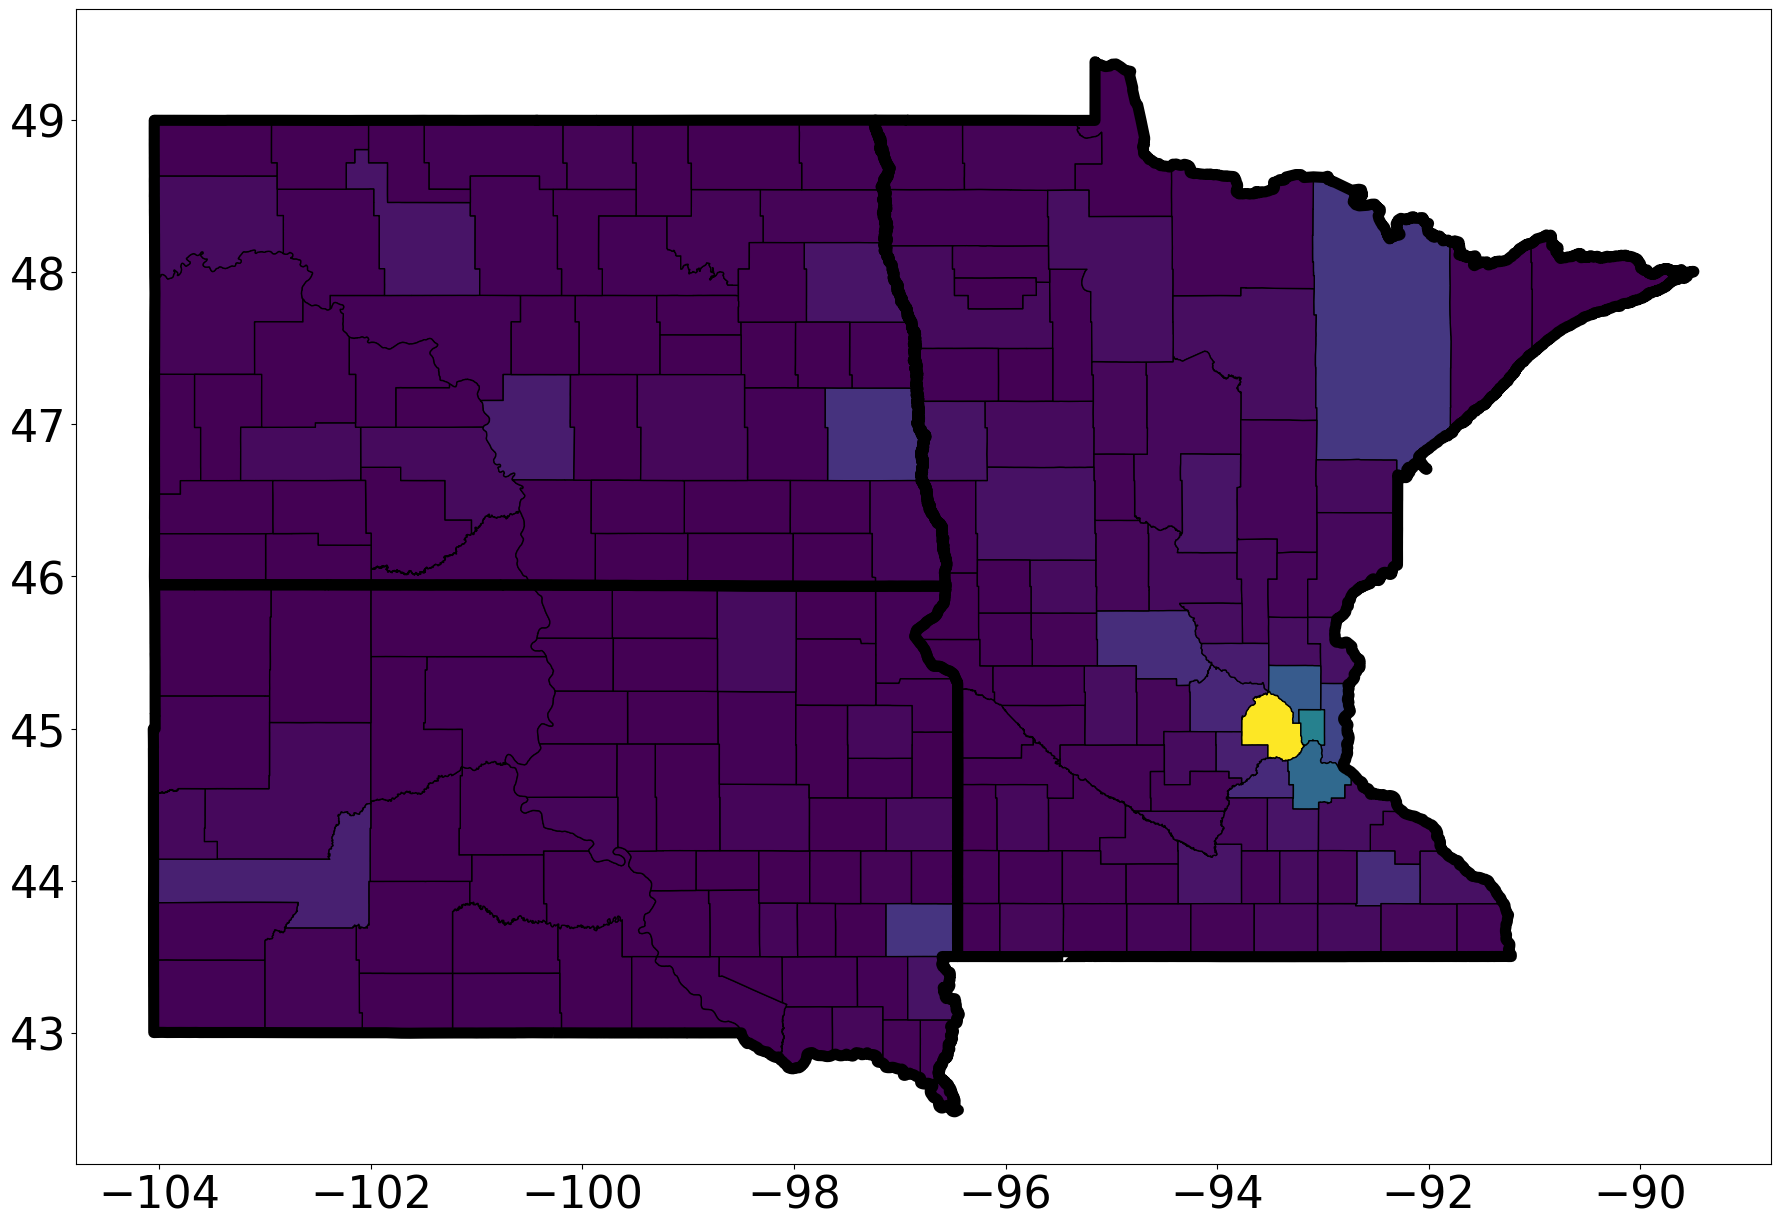

In [3]:
# def import_geo_data(filename, index_col = 'Date', FIPS_name = 'FIPS'):
plt.rcParams.update({'font.size': 32})
filename = "countiesWithStatesAndPopulation.shp"
index_col = "FIPS"
map_data = geopandas.read_file(filename = filename).set_index(["State", 
                                                               "NAME"])
states = ["North Dakota", 
          "South Dakota", 
          "Minnesota"]
map_plot_data = map_data.loc[states]
state_df = map_plot_data.dissolve(by=["State"], aggfunc = "median")

fig, ax = plt.subplots(figsize = (30,15))
map_plot_data.plot(column = "Population", 
                   cmap = "viridis",
                   alpha = 1, 
                   edgecolor = "k",
                  ax = ax)
state_df.plot(color = "None", 
                  alpha = 1,
                  edgecolor = "k",
                  linewidth = 8,
                          ax = ax)



In [4]:
def import_geo_data(filename, FIPS_name = "FIPS"):
    map_data = geopandas.read_file(filename = filename).rename(
        columns = {"State":"state"})
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data
map_data = import_geo_data(filename = filename, FIPS_name = index_col)
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
FIPS,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


<AxesSubplot:>

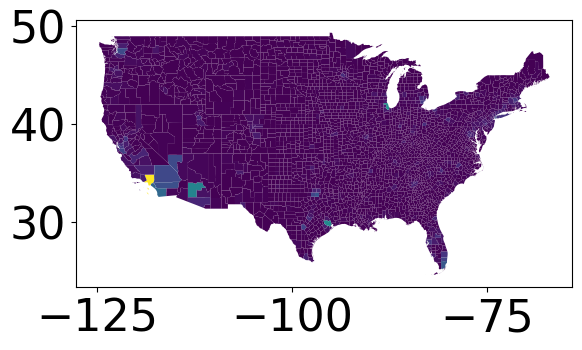

In [5]:
# does not include Alaska or Hawaii
map_data[~map_data['state'].isin(
    ['Hawaii', 'Alaska'])].plot(column = 'Population')

In [6]:
u_data = pd.read_csv("countyUnemploymentData.csv",
                    encoding = "latin1",
                    parse_dates = True,
                    index_col = ["date", "fips_code"])
u_data = u_data[list(u_data.keys())[-4:]]


/var/folders/7l/h6dgk4zj46v592scp_p1cgwr0000gn/T/ipykernel_64818/12581566.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  u_data = pd.read_csv("countyUnemploymentData.csv",


In [7]:
import copy as copy
def create_merged_geo_dataframe(data, map_data):
    data_frame_initialized = False
    matching_gpd = {}
    counties = data.groupby("fips_code").mean().index.unique()
    dates = data.groupby("date").mean().index.unique()
    for key, val in data.items():
        matching_gpd[key] = copy.copy(
            map_data[map_data.index.isin(counties)])
        for date in dates:
            val_slice = val.loc[date]
            val_slice.reset_index().set_index("fips_code")
            matching_gpd[key][date] = val_slice
    return matching_gpd
dates = u_data.groupby("date").mean().index.unique()
u_data = create_merged_geo_dataframe(u_data, map_data)

/var/folders/7l/h6dgk4zj46v592scp_p1cgwr0000gn/T/ipykernel_64818/3574848602.py:15: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  dates = u_data.groupby("date").mean().index.unique()
/var/folders/7l/h6dgk4zj46v592scp_p1cgwr0000gn/T/ipykernel_64818/3574848602.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  counties = data.groupby("fips_code").mean().index.unique()
/var/folders/7l/h6dgk4zj46v592scp_p1cgwr0000gn/T/ipykernel_64818/3574848602.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  da

In [8]:
u_data['Unemployment Rate']

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00
FIPS,,,,,,,,,,,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,...,4.7,4.9,5.2,5.7,5.3,5.3,5.5,4,4.3,5.8
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,...,4.2,3.8,3.9,4.4,4.1,4.1,4.4,3.1,3.2,4.5
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,...,4.9,4.6,4.6,5.1,5.1,5.1,4.9,3.4,3.9,5.5
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,...,5.6,5.3,5.3,6,5.9,5.7,5.8,4.1,4.5,6.2
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,...,5,4.6,4.7,5.6,5.6,5.9,5.5,4,4.2,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,...,2,1.9,1.8,1.5,1.7,2,1.8,1.7,1.8,1.9
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,...,3.2,2,2.1,2.6,3.1,3.1,2.4,2.1,2.6,3.8
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,...,4.5,3.9,3.9,3.8,4.4,4.4,4.3,3.7,3.7,4.1


In [9]:
# matplotlib will give us warning because we are setting the value a slice
import warnings
warnings.filterwarnings("ignore")

key = "Unemployment Rate"
new_key = "Normalized " + key + " (Feb 2020)"

u_data[new_key] = u_data[key].copy()

for date in dates:
    u_data[new_key][date] = u_data[key][date].sub(
        u_data[key][datetime.datetime(2020,2,1)])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [11]:
new_key


'Normalized Unemployment Rate (Feb 2020)'

TypeError: '>=' not supported between instances of 'str' and 'float'

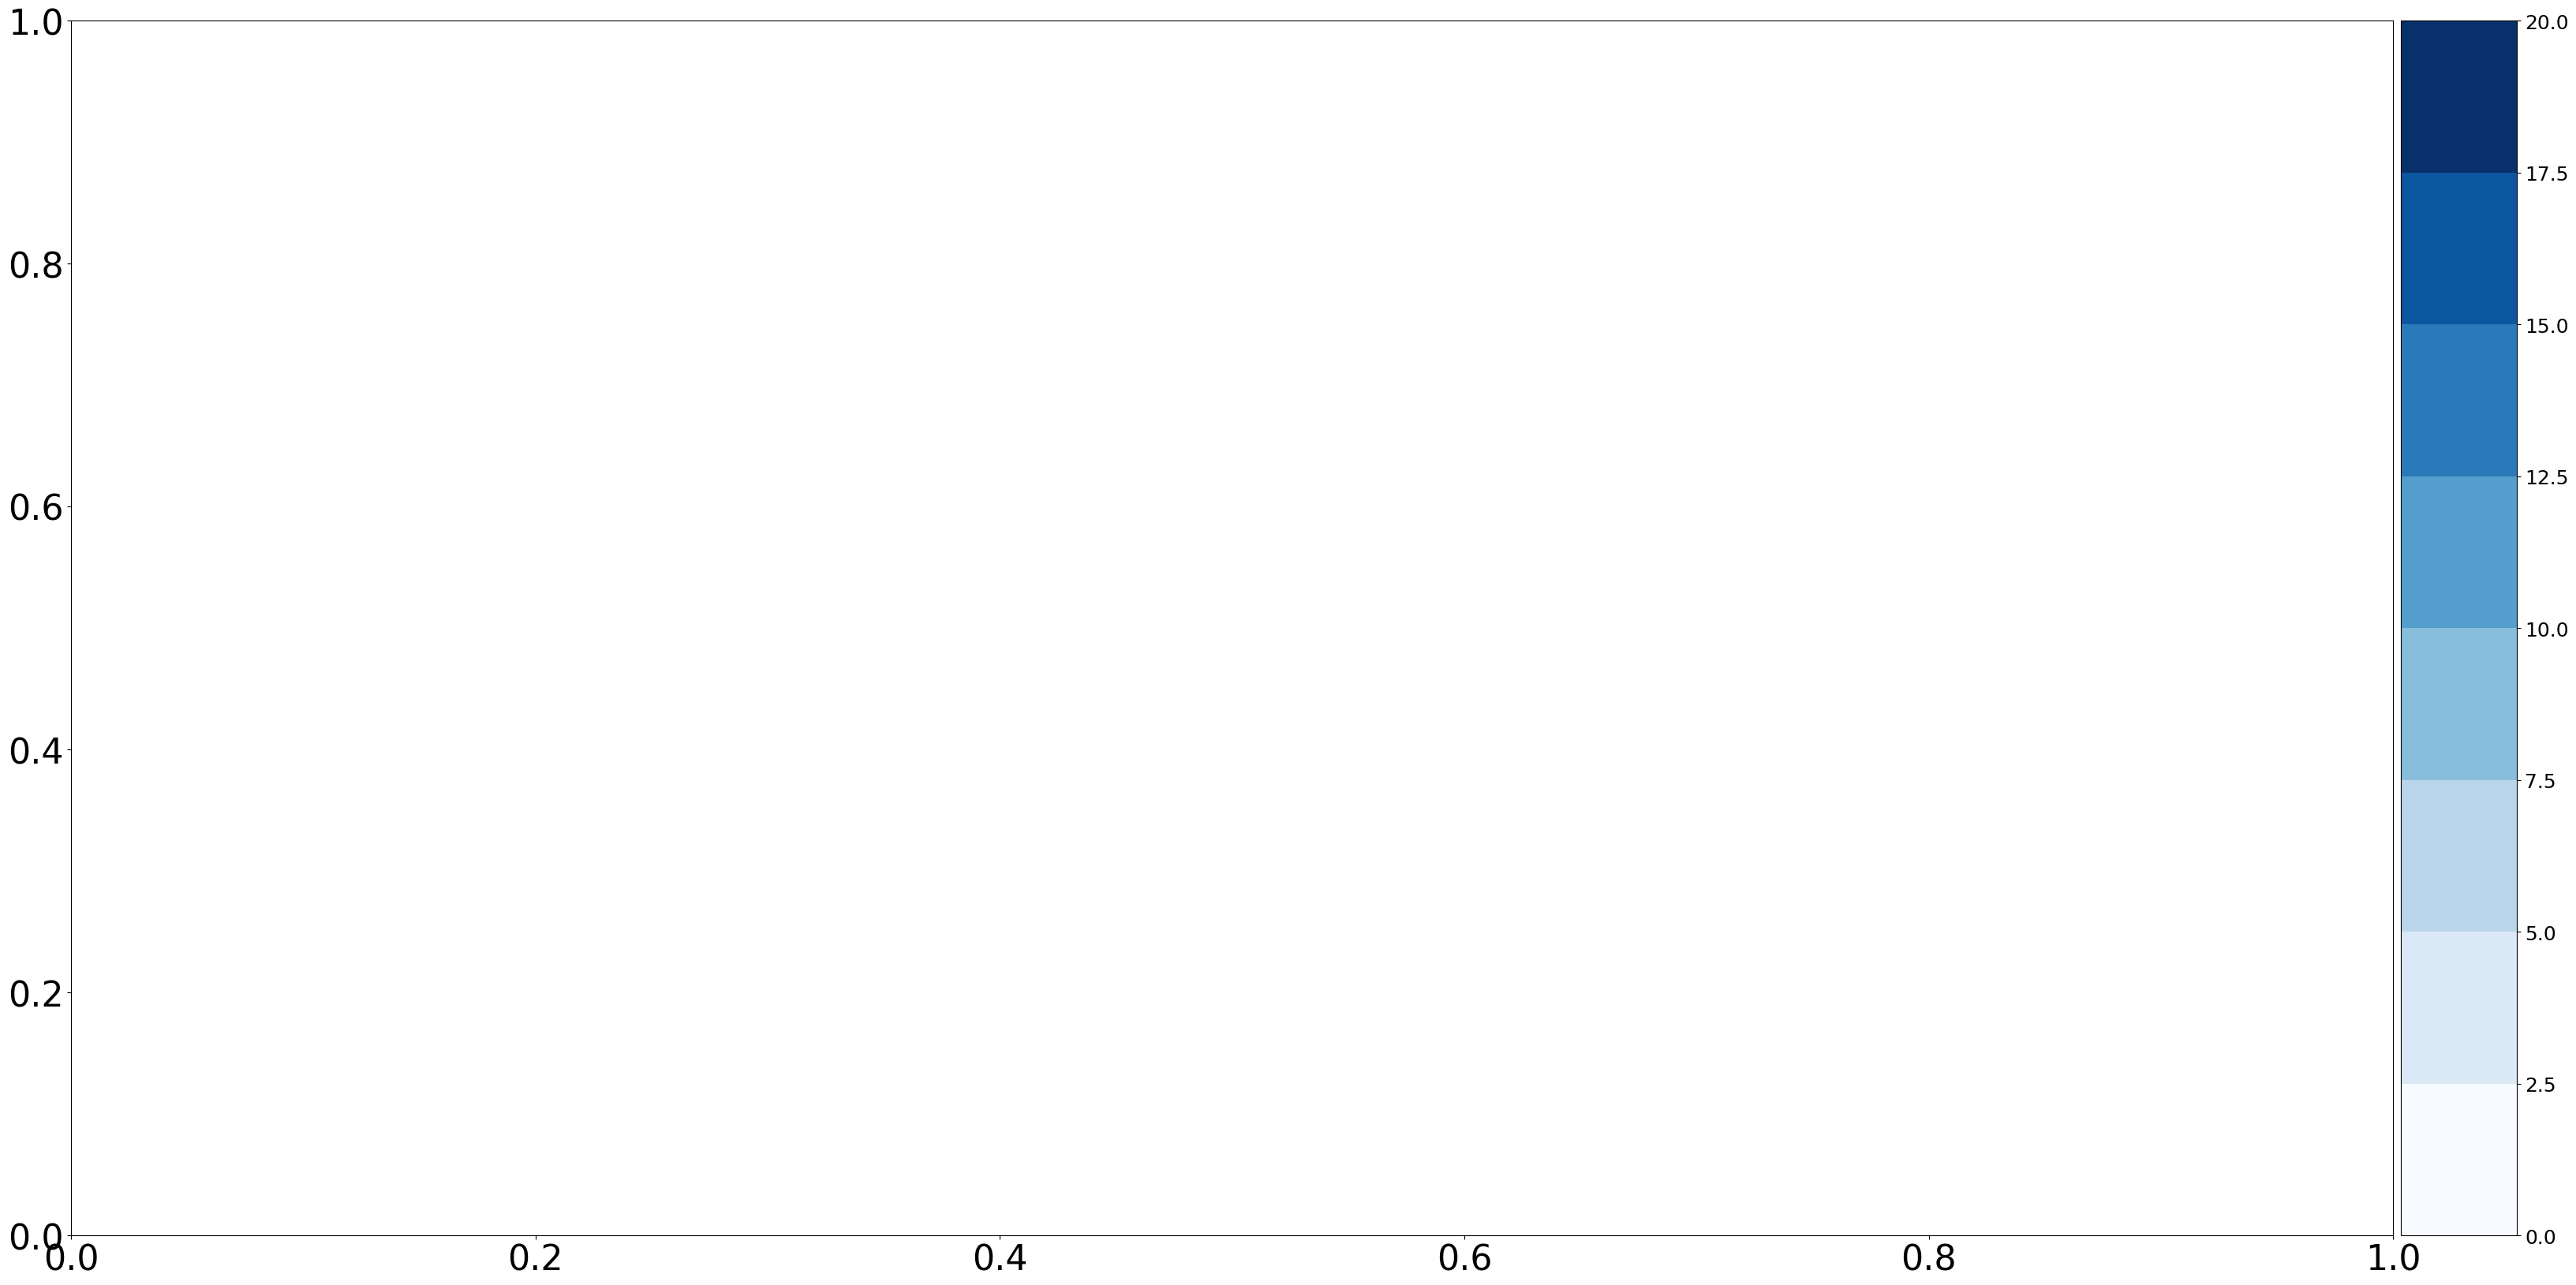

In [24]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

key = "Unemployment Rate"
plot_data = u_data[key].copy()
plot_data = plot_data[~plot_data["state"].isin(["Hawaii", "Alaska"])]
state_df = plot_data.dissolve(by=["state"], aggfunc = "median")
for date in dates:
    fig, ax = plt.subplots(figsize = (40,20))
  

    vmin = 0
    vmax = 20
   
    cmap = cm.get_cmap("Blues", 8)

    norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)
    sm = cm.ScalarMappable(cmap = cmap, norm = norm)

    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", 
                              size = size, 
                              pad = .1)

    cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
    cbar.ax.tick_params(labelsize = 18)
    vals = list(cbar.ax.get_yticks())
    
    vals.append(plot_data[dates].max().max())
    cbar.ax.set_yticklabels(vals)
    cbar.ax.set_ylabel(key, fontsize = 20)
    plot_data.plot(ax = ax, 
            cax = ax,
           column = date,
           cmap = cmap, legend = False,
           linewidth = .5, edgecolor = "white",
           norm = norm)

    state_df.plot(color = "None", 
                  alpha = 1,
                  edgecolor = "k",
                  linewidth = 5,
                  ax = ax)
    ax.set_title(str(date)[:10] + "\n" + key)

In [ ]:
key = new_key
          

plot_data = u_data[key].copy()
plot_data = plot_data[~plot_data["state"].isin(["Hawaii", "Alaska"])] 
state_df = plot_data.dissolve(by=["state"], aggfunc = "median")
for date in dates:
    fig, ax = plt.subplots(figsize = (40,20))
        # dissolve performs groupby operation and aggregates geoids to the
        #  level grouped by

    vmin = -20
    vmax = 20
    # choose color bar format
    cmap = cm.get_cmap("coolwarm", 15)
    # choose color bar values
    norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", 
                              size = size, 
                              pad = .1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    # append max values from plot_df[dates] to vals for cbar
    vals.append(plot_data[dates].max().max())
    cbar.ax.set_yticklabels(vals)
    cbar.ax.set_ylabel(key, fontsize=20)

    plot_data.plot(ax=ax,
                   cax=ax,
                   column = date,
            vmin=vmin, vmax=vmax,
            cmap=cmap, legend=False, 
            linewidth = .5, edgecolor="white",
                   norm=norm)

    state_df.plot(color = 'None',
                 alpha = 1,
                 edgecolor = 'k',
                 linewidth = 5,
                 ax = ax)
    ax.set_title(str(date)[:10] + '\n' + key)

# Create Interactive Map with Plotly

In [13]:
import plotly.express as px
key = "Unemployment Rate"
plot_df = u_data[key]
plot_df = plot_df.to_crs(epsg=4326).rename(
    # transform dates to str because plotly will throw error
    #  if datetime format passed as key
    columns = {date:str(date)[:10] for date in plot_df[dates].keys()})
cname = str(dates[-1])[:10]
plot_df[cname] = plot_df[cname].round(2)
hover_name = "NAME"
fig = px.choropleth_mapbox(plot_df.reset_index(),
                          geojson = plot_df,#.reset_index(),
                          locations = "FIPS",
                          hover_name = hover_name,
                           hover_data = [cname],
                          color = cname,
                          color_continuous_scale="ylgnbu",
                          center = {"lat":plot_df["geometry"].centroid.y.mean(),
                                   "lon":plot_df["geometry"].centroid.x.mean()} ,
                          zoom =4,
                          opacity = .6,
                          title = key,
                          mapbox_style = "carto-positron",
                          height =900)

fig.show()
fig.write_html(key+".html")

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

In [14]:
import os
map_path = geopandas.datasets.get_path("naturalearth_lowres")
world = geopandas.read_file(map_path).to_crs(epsg = 4326)
world.set_index("iso_a3", inplace = True)
world


,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
SRB,6944975.0,Europe,Serbia,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
MNE,622137.0,Europe,Montenegro,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
-99,1794248.0,Europe,Kosovo,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


In [15]:
EFW = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3","Year"],
                  parse_dates = True).rename(columns = {"Summary":"EFW"})
EFW_keys = list(EFW.keys())[-7:]
EFW

Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1971-01-01       NaN       NaN                 NaN   
           1972-01-01       NaN       NaN                 NaN   
           1973-01-01       NaN       NaN                 NaN   
           1974-01-01       NaN       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1971-01-01                               NaN          NaN   
           1972-01-01                               NaN          NaN   
           1973-01-01                               NaN          NaN   
           1974-01-01                               NaN          NaN   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        1970-01-01                               NaN         NaN   
           1971-01-01                               NaN         NaN   
           1972-01-01                               NaN         NaN   
           1973-01-01                               NaN         NaN   
           1974-01-01                               NaN         NaN   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  
ISO_Code_3 Year                         
AGO        1970-01-01              NaN  
           1971-01-01              NaN  
           1972-01-01              NaN  
           1973-01-01              NaN  
           1974-01-01              NaN  
...                                ...  
ZWE        2014-01-01         0.215452  
           2015-01-01         0.106888  
           2016-01-01         0.012463  
           2017-01-01        -0.013579  
           2018-01-01         0.004606  

[8085 rows x 8 columns]

In [16]:
EFW_2018 = EFW[EFW.index.get_level_values(
    "Year") == "2018"].reset_index().set_index("ISO_Code_3")
for key in EFW_keys:
    world[key + " 2018"] = EFW_2018[key]
world

,pop_est,continent,name,gdp_md_est,geometry,EFW 2018,Size of Government 2018,Legal System and Property Rights 2018,Sound Money 2018,Freedom to Trade Internationally 2018,Regulation 2018,RGDP Per Capita 2018
iso_a3,,,,,,,,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",6.180535,5.981744,5.183652,6.928075,5.493766,7.328106,NaN
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",6.649848,6.505578,5.311311,8.376938,6.028092,7.034947,0.192306
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",8.109616,6.582435,8.026669,9.578479,7.639533,8.724444,0.042681
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",8.279612,7.409095,7.646530,9.772494,7.783384,8.784245,0.084265
...,...,...,...,...,...,...,...,...,...,...,...,...
SRB,6944975.0,Europe,Serbia,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7.129546,6.820399,5.452178,8.333843,7.783669,7.265056,0.101255
MNE,622137.0,Europe,Montenegro,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",7.450013,6.724992,5.418196,9.456727,8.500108,7.144030,0.194047
-99,1794248.0,Europe,Kosovo,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cities_path = geopandas.datasets.get_path(
    'naturalearth_cities')
cities = geopandas.read_file(cities_path).to_crs(epsg=4326)
cities["Country"] = ""
# cities["Country"].iloc[0] = "ITA"
cities

,name,geometry,Country
0,Vatican City,POINT (12.45339 41.90328),
1,San Marino,POINT (12.44177 43.93610),
2,Vaduz,POINT (9.51667 47.13372),
3,Lobamba,POINT (31.20000 -26.46667),
4,Luxembourg,POINT (6.13000 49.61166),
...,...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731),
239,São Paulo,POINT (-46.62697 -23.55673),
240,Sydney,POINT (151.21255 -33.87137),
241,Singapore,POINT (103.85387 1.29498),


In [18]:
for ix in cities.index:
    try:
       
        row_with_city = world["geometry"].contains(cities.loc[ix]["geometry"])
 
        cities.iloc[ix, 'Country'] = world[row_with_city].index[0]
    except:
        continue
cities

,name,geometry,Country
0,Vatican City,POINT (12.45339 41.90328),
1,San Marino,POINT (12.44177 43.93610),
2,Vaduz,POINT (9.51667 47.13372),
3,Lobamba,POINT (31.20000 -26.46667),
4,Luxembourg,POINT (6.13000 49.61166),
...,...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731),
239,São Paulo,POINT (-46.62697 -23.55673),
240,Sydney,POINT (151.21255 -33.87137),
241,Singapore,POINT (103.85387 1.29498),


In [19]:
cities[cities["Country"] != ""]

,name,geometry,Country


In [20]:
cities[cities["Country"] == ""]

,name,geometry,Country
0,Vatican City,POINT (12.45339 41.90328),
1,San Marino,POINT (12.44177 43.93610),
2,Vaduz,POINT (9.51667 47.13372),
3,Lobamba,POINT (31.20000 -26.46667),
4,Luxembourg,POINT (6.13000 49.61166),
...,...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731),
239,São Paulo,POINT (-46.62697 -23.55673),
240,Sydney,POINT (151.21255 -33.87137),
241,Singapore,POINT (103.85387 1.29498),


In [21]:
import matplotlib.patheffects as pe
for key in EFW_keys:
    column = key + " 2018"
    fig, ax = plt.subplots(figsize = (40,20))
    cmap = cm.get_cmap("Blues", 20)
    norm = cm.colors.Normalize(vmin = world[column].min(),
                              vmax = world[column].max())
    sm = cm.ScalarMappable(cmap = cmap,
                          norm = norm)
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right",
                             size = size,
                             pad = .1)
    cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
    cbar.ax.tick_params(labelsize = 24)
    vals = [round(v,2) for v in cbar.ax.get_yticks()]
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)
    
    world.plot(color = "k", alpha = .25, ax = ax)
    world.plot(column = column,
              cmap = cmap,
               linewidth = 1.5,
               edgecolor = "k",
              ax = ax,
              alpha = .95)
    cities[cities["Country"]!= ""].plot(color = "C3",
                                       markersize = 35,
                                       ax = ax)
    
    area = world.area
    for ix in world.index:
        if area[ix] >= area["IRL"]:
            
            centroid = world.loc[ix]["geometry"].representative_point()
            x, y = centroid.x, centroid.y
            ax.text(x, y, ix,
                   va ="center", ha = "center",
                   fontsize = 9,)

    ax.set_title(column)

ValueError: cannot convert float NaN to integer

<Figure size 4000x2000 with 2 Axes>

ValueError: cannot convert float NaN to integer

<Figure size 4000x2000 with 2 Axes>

ValueError: cannot convert float NaN to integer

<Figure size 4000x2000 with 2 Axes>

ValueError: cannot convert float NaN to integer

<Figure size 4000x2000 with 2 Axes>

ValueError: cannot convert float NaN to integer

<Figure size 4000x2000 with 2 Axes>

ValueError: cannot convert float NaN to integer

<Figure size 4000x2000 with 2 Axes>

ValueError: cannot convert float NaN to integer

<Figure size 4000x2000 with 2 Axes>

In [22]:
nemployment_data = pd.read_csv("countyUnemploymentData.csv",
                    encoding = "latin1",
                    parse_dates = True,
                               index_col =  ["date", "fips_code"]).reset_index().rename(columns = {"fips_code":"FIPS"}).set_index( ["date", "FIPS"])
unemployment_data = unemployment_data[list(unemployment_data.keys())[-4:]]
unemployment_data

NameError: name 'unemployment_data' is not defined

In [23]:
pd.merge(unemployment_data.reset_index(), map_data, on=['FIPS'], how="inner").set_index(["date", "FIPS"]).sort_index()



NameError: name 'unemployment_data' is not defined